<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/SVM(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Load the Dataset

In [2]:
data1=pd.read_csv("/content/forestfires.csv")
data1.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


Basic EDA

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data1.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

Dropping the un-necessary Features

In [7]:
data2=data1.iloc[:,0:11]
forest=pd.concat([data2,data1["size_category"]],axis=1)
forest.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,small


Label Encoding the Categorical Features

In [11]:
label=LabelEncoder()
forest["month"]=label.fit_transform(forest["month"])
forest["day"]=label.fit_transform(forest["day"])
forest["size_category"]=label.fit_transform(forest["size_category"])
forest.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1
7,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1
8,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,1
9,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,1


Independent and Target Variable

In [15]:
x1=forest.iloc[:,0:11]
y1=forest["size_category"]
x1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Visualisation

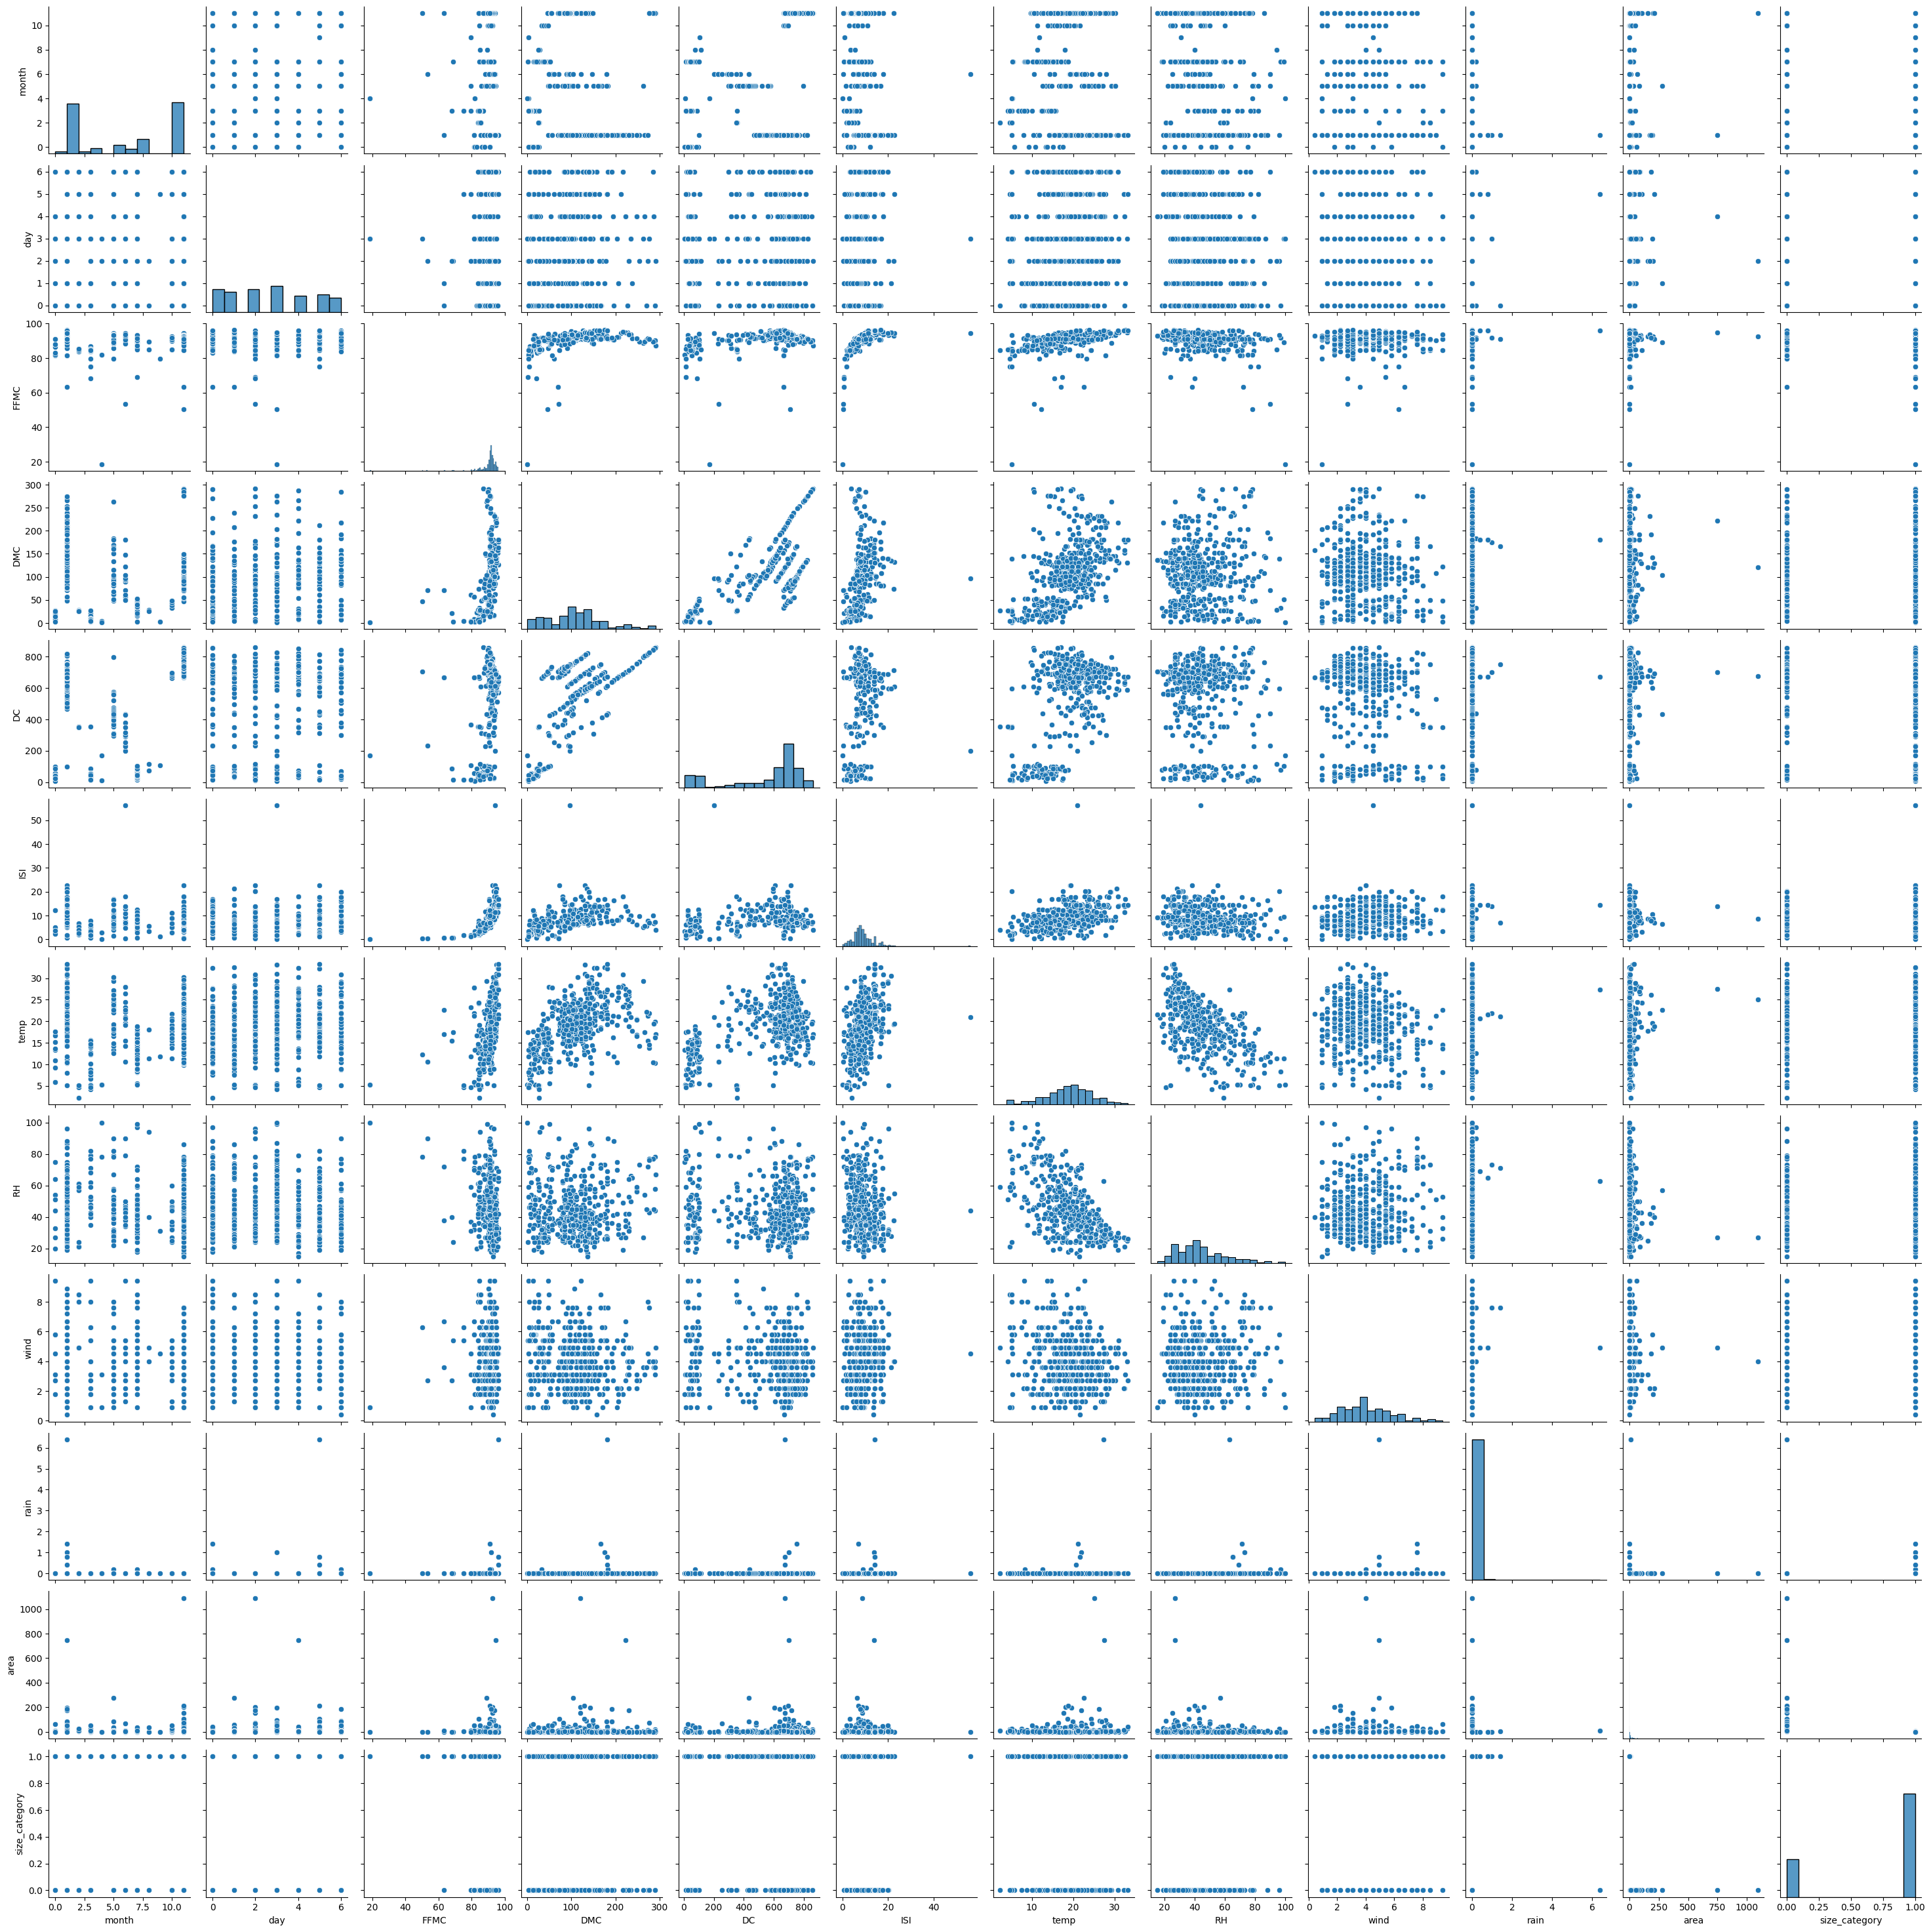

In [16]:
sns.pairplot(forest)

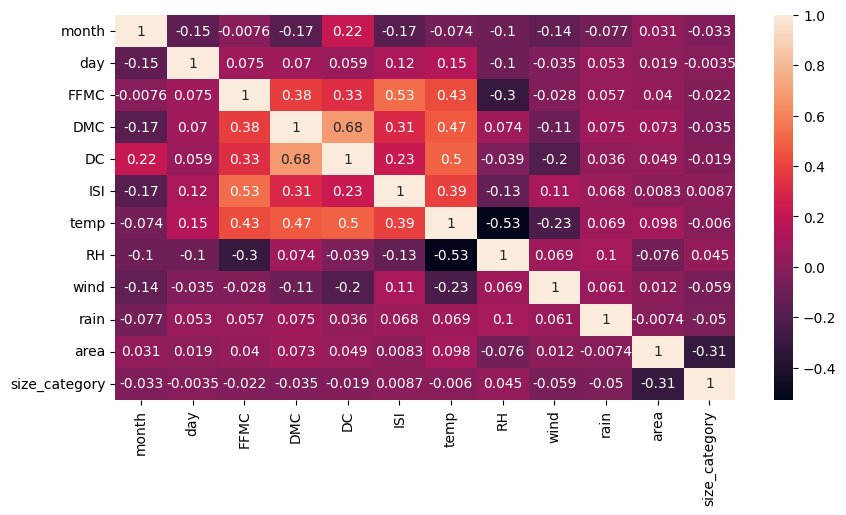

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(forest.corr(),annot=True)
plt.show()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33)
x_train.shape,x_test.shape

((346, 11), (171, 11))

Using GridSearchCV for Better Parameters

In [28]:
model=SVC()
parameters=[{"kernel":["rbf"],"gamma":[100,90,70,50,0.1,0.001,0.00001],"C":[50,10,4,5,0.1,0.001]}]
grid=GridSearchCV(model,parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 10, 4, 5, 0.1, 0.001],
                          'gamma': [100, 90, 70, 50, 0.1, 0.001, 1e-05],
                          'kernel': ['rbf']}])

In [29]:
grid.best_score_,grid.best_params_

(0.9105042016806723, {'C': 50, 'gamma': 1e-05, 'kernel': 'rbf'})

Model Building with best Parameters

In [31]:
model1=SVC(kernel="rbf",gamma=1e-05,C=50)
model1.fit(x_train,y_train)

SVC(C=50, gamma=1e-05)

In [33]:
pred1=model1.predict(x_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

Accuracy Score

In [35]:
accuracy_score(pred1,y_test)*100

94.73684210526315

Confusion Matrix

In [36]:
confusion_matrix(y_test,pred1)

array([[ 41,   9],
       [  0, 121]])

Classification Report

In [38]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        50
           1       0.93      1.00      0.96       121

    accuracy                           0.95       171
   macro avg       0.97      0.91      0.93       171
weighted avg       0.95      0.95      0.95       171

